In [35]:
import numpy as np
import pandas as pd
import IPython.display as ipd
import ast

#Leggo dal file tracks.csv, presente tra i metadati di FMA
path = 'C:/Users/bonno/ProgettoBigData/fma_metadata/tracks.csv'

tracks = pd.read_csv(path, index_col=0, header=[0, 1])

COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
           ('track', 'genres'), ('track', 'genres_all')]
for column in COLUMNS:
    tracks[column] = tracks[column].map(ast.literal_eval)

COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
           ('album', 'date_created'), ('album', 'date_released'),
           ('artist', 'date_created'), ('artist', 'active_year_begin'),
           ('artist', 'active_year_end')]
for column in COLUMNS:
    tracks[column] = pd.to_datetime(tracks[column])
SUBSETS = ('small', 'medium', 'large')
try:
    categorie = pd.CategoricalDtype(categories=SUBSETS, ordered=True)
    tracks['set', 'subset'] = tracks['set', 'subset'].astype(categorie)
except ValueError:
    # the categories and ordered arguments were removed in pandas 0.25
    tracks['set', 'subset'] = tracks['set', 'subset'].astype(
             pd.CategoricalDtype(categories=SUBSETS, ordered=True))

COLUMNS = [('track', 'genre_top'), ('track', 'license'),
           ('album', 'type'), ('album', 'information'),
           ('artist', 'bio')]
for column in COLUMNS:
    tracks[column] = tracks[column].astype('category')

,genre
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
20,NaN
...,...
155316,Rock
155317,Rock
155318,Rock


,genre
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
134,Hip-Hop
...,...
155315,Rock
155316,Rock
155317,Rock


,genre,counts
13,Rock,14182
5,Experimental,10608
4,Electronic,9372
7,Hip-Hop,3552
6,Folk,2803
12,Pop,2332
8,Instrumental,2079
9,International,1389
1,Classical,1230
10,Jazz,571


,genre
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
134,Hip-Hop
...,...
155315,Rock
155316,Rock
155317,Rock


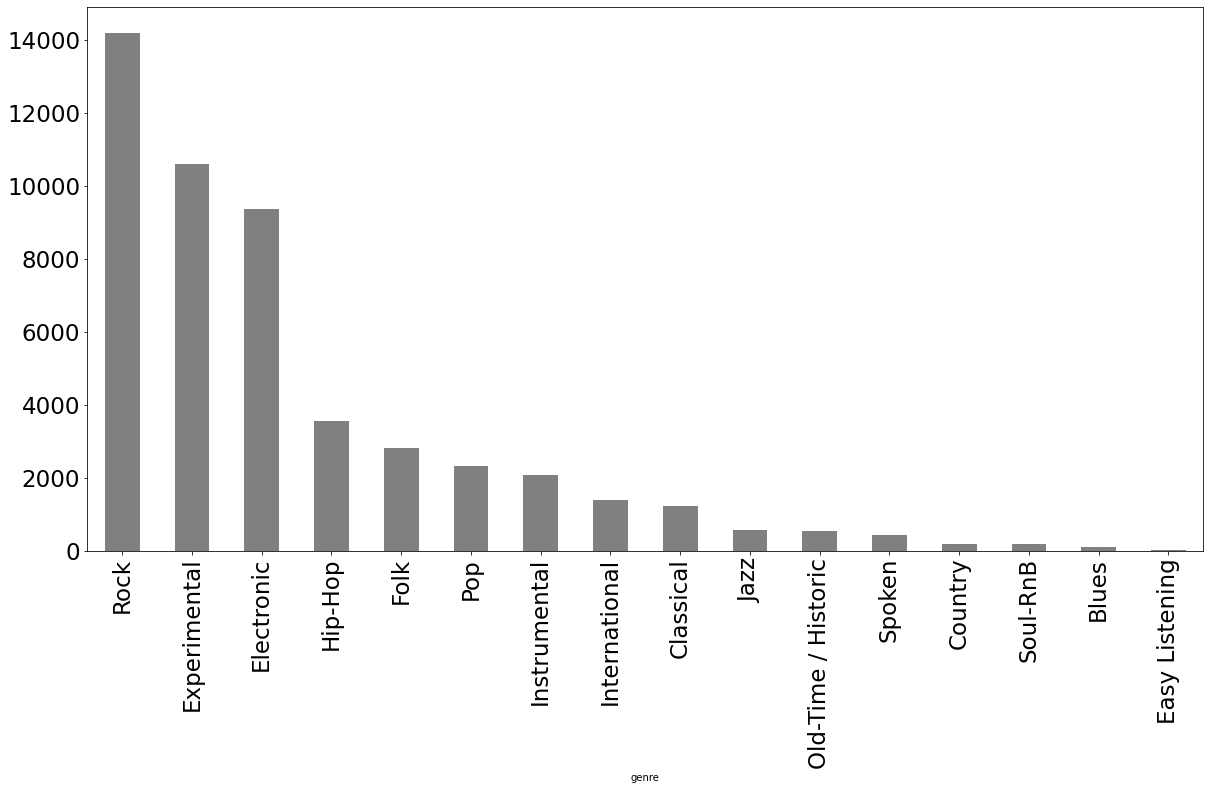

In [37]:
#TRACCE AVENTI UN SOLO GENERE MUSICALE, E CHE E' UNO DEGLI 8 USATI

#Mi interessa solo avere l'id della traccia e il rispettivo genere musicale principale
genres = tracks.loc[tracks.index, ('track', 'genre_top')]

tracks_genres = pd.DataFrame(data=genres.values, index = genres.index, columns=["genre"])
#Elimino le righe riguardanti le tracce che non hanno l'attributo genre_top
tracks_genres = tracks_genres.dropna()
ipd.display(tracks_genres)
count_df = tracks_genres.groupby(['genre']).size().reset_index(name='counts').sort_values(ascending=False, by=['counts'])


ipd.display(count_df)
ax = count_df.plot.bar( legend = False, fontsize = '23', figsize = (20,10), color='grey', x = 'genre', rot=90)

wanted_genres = np.array(["Hip-Hop", "Rock", "International","Pop","Experimental","Folk","Instrumental","Electronic"])

#Tengo solo le tracce appartenenti agli 8 generi musicali che mi interessano
tracks_genres['is_wanted_genre'] = tracks_genres.genre.isin(wanted_genres)
tracks_genres = tracks_genres[tracks_genres.is_wanted_genre == True]
tracks_genres = tracks_genres.drop(columns='is_wanted_genre')

ipd.display(tracks_genres)

In [31]:
#Mostro la quantità di tracce appartenenti ad un solo genere di quelli principali
ipd.display(tracks_genres.groupby(['genre']).size())

hiphop_songs_df = tracks_genres.loc[tracks_genres['genre'] == "Hip-Hop"]

genre
Blues                      0
Classical                  0
Country                    0
Easy Listening             0
Electronic              9372
Experimental           10608
Folk                    2803
Hip-Hop                 3552
Instrumental            2079
International           1389
Jazz                       0
Old-Time / Historic        0
Pop                     2332
Rock                   14182
Soul-RnB                   0
Spoken                     0
dtype: int64

In [32]:
#TRACCE DENTRO AL MEDIUM DATASET
medium = tracks[tracks['set', 'subset'] <= 'medium']
medium_genres = medium.loc[medium.index, ('track', 'genre_top')]

medium_dataset = pd.DataFrame(data=medium_genres.values, index = medium_genres.index, columns=["genre"])

ipd.display(medium_dataset)
#Mostro la quantità di tracce appartenenti ad un solo genere di quelli principali
ipd.display(medium_dataset.groupby(['genre']).size())

electronic_songs_df = medium_dataset.loc[medium_dataset['genre'] == "Electronic"]
experimental_songs_df = medium_dataset.loc[medium_dataset['genre'] == "Experimental"]
rock_songs_df = medium_dataset.loc[medium_dataset['genre'] == "Rock"]


,genre
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
134,Hip-Hop
...,...
155297,Instrumental
155298,Folk
155306,Folk


genre
Blues                    74
Classical               619
Country                 178
Easy Listening           21
Electronic             6314
Experimental           2251
Folk                   1519
Hip-Hop                2201
Instrumental           1350
International          1018
Jazz                    384
Old-Time / Historic     510
Pop                    1186
Rock                   7103
Soul-RnB                154
Spoken                  118
dtype: int64

In [74]:
#TRACCE CHE APPARTENGONO A PIU' DIUN GENERE, MA IL CUI GENERE PRINCIPALE E' QUELLO VOLUTO
all_genres = tracks.loc[tracks.index,('track', 'genres_all')]
ipd.display(all_genres)
international_songs = {}
pop_songs = {}
instrumental_songs = {}
folk_songs = {}

for track_id, genres in all_genres.items(): #Ciclo su tutte le canzoni del large set
    if 2 in genres: #La canzone è internazionale
        unwanted_genres = [12,15,38,1235,10,17,21]
        flag = False #Indica se uno dei generi non voluti è presente
        for g in unwanted_genres:
            if g in genres:
                flag = True
                break
        if not flag:
            international_songs[track_id] = "International"
            
    if 10 in genres: #La canzone è pop
        unwanted_genres = [12,15,38,1235,2,17,21]
        flag = False #Indica se uno dei generi non voluti è presente
        for g in unwanted_genres:
            if g in genres:
                flag = True
                break
        if not flag:
            pop_songs[track_id] = "Pop"
            
    if 1235 in genres: #La canzone è instrumental
        unwanted_genres = [12,15,38,10,2,17,21]
        flag = False #Indica se uno dei generi non voluti è presente
        for g in unwanted_genres:
            if g in genres:
                flag = True
                break
        if not flag:
            instrumental_songs[track_id] = "Instrumental"
            
    if 17 in genres: #La canzone è folk
        unwanted_genres = [12,15,38,1235,2,10,21]
        flag = False #Indica se uno dei generi non voluti è presente
        for g in unwanted_genres:
            if g in genres:
                flag = True
                break
        if not flag:
            folk_songs[track_id] = "Folk"
    
ipd.display(len(international_songs))
ipd.display(len(pop_songs))
ipd.display(len(instrumental_songs))
ipd.display(len(folk_songs))

international_songs_df = pd.DataFrame(data=international_songs.values(), index = international_songs.keys(), columns=["genre"])
pop_songs_df = pd.DataFrame(data=pop_songs.values(), index = pop_songs.keys(), columns=["genre"])
instrumental_songs_df = pd.DataFrame(data=instrumental_songs.values(), index = instrumental_songs.keys(), columns=["genre"])
folk_songs_df = pd.DataFrame(data=folk_songs.values(), index = folk_songs.keys(), columns=["genre"])


track_id
2                      [21]
3                      [21]
5                      [21]
10                     [10]
20        [17, 10, 76, 103]
                ...        
155316             [25, 12]
155317             [25, 12]
155318             [25, 12]
155319             [25, 12]
155320     [169, 10, 12, 9]
Name: (track, genres_all), Length: 106574, dtype: object

1732

2582

2707

3746

In [33]:
#international_songs_df = tracks_genres.loc[tracks_genres['genre'] == "International"]
#pop_songs_df = tracks_genres.loc[tracks_genres['genre'] == "Pop"]
#instrumental_songs_df = tracks_genres.loc[tracks_genres['genre'] == "Instrumental"]
#folk_songs_df = tracks_genres.loc[tracks_genres['genre'] == "Folk"]

In [34]:
track_genres_mio = rock_songs_df.append([electronic_songs_df, experimental_songs_df, hiphop_songs_df, international_songs_df, pop_songs_df, instrumental_songs_df, folk_songs_df])
track_genres_mio = track_genres_mio.sort_index()
track_genres_mio.to_csv('tracks_genres_mio.csv')